# **Fake News Prediction**

![image](readme.png)

## Authors

1. Ida Chepng'eno
2. George Mbugua
3. Kevan Ndwiga
4. Daniel Muruthi
5. Mike Kiptoch
6. Neville Ngenzi



## 1. **BUSINESS UNDERSTANDING**

The media industry is struggling with the widespread issue of fake news, which undermines public trust and journalistic integrity. Social media platforms enable misinformation to spread rapidly, leading to polarized opinions and potential legal risks.

To combat this, the media industry need advanced systems for real-time detection and verification of fake news. By implementing these mechanisms, media organizations can protect their reputation and ensure they are providing accurate, reliable information to their audiences.

The goal is to enhance public trust and support a more informed society by reducing the impact of fake news.


### a. Introduction

In today's digital age, the spread of misinformation, commonly known as fake news, has become a pervasive issue, undermining the integrity of journalistic organizations worldwide. The impact of fake news extends beyond politics, significantly affecting public health. In our exploration, we confront the pervasive influence of fake news, epitomized by [Donald Trump's election](https://misinforeview.hks.harvard.edu/article/twitter-flagged-donald-trumps-tweets-with-election-misinformation-they-continued-to-spread-both-on-and-off-the-platform/) claims. His dissemination of unfounded allegations of voter fraud not only ignited a storm of misinformation but also eroded trust in democratic institutions. As we delve deeper, we confront the urgent need to combat fake news' corrosive effects on truth and democracy. Researchers and policymakers are increasingly leveraging these tools to predict and mitigate the dissemination of fake news, enabling targeted interventions to combat its harmful effects.

## b) Problem Statement

### **What is the prevailing Circumstance?**

The proliferation of social media platforms and digital news outlets has facilitated the rapid dissemination of information, both accurate and false. This unprecedented accessibility to news sources has led to an alarming increase in the circulation of fake news, which poses significant risks to most news sectors and its stakeholders.

### **What problem is being addressed?**

The primary problem being addressed is the pervasive presence of fake news within the digital media landscape. Fake news undermines the credibility of the media industry as a reputable journalistic entity, erodes reader confidence, and contributes to the polarization of public opinion. Moreover, the dissemination of false information can have far-reaching consequences, including social unrest, political instability, and legal ramifications.

### **How the project aims to solve the problems?**

The project aims to develop and implement sophisticated systems for detecting and flagging fake news in real-time. By leveraging cutting-edge technologies such as natural language processing (NLP), machine learning (ML), and data analytics, the media industry intends to identify and verify the authenticity of news articles and sources. Additionally, the project will involve the establishment of rigorous editorial standards and fact-checking procedures to ensure the dissemination of accurate and reliable information to its audience. Through these initiatives, most News sector seeks to safeguard its reputation, enhance public trust, and uphold the principles of ethical journalism.



### c. Objectives

#### Main Objectives

- To implement robust fake news detection mechanisms capable of identifying and flagging misinformation in real-time, thereby safeguarding the integrity and credibility of most News sectors.

#### Specific Objectives

1. Develop a comprehensive dataset of labeled news articles, encompassing both genuine and fake content, to train and validate machine learning models for fake news detection.
2. Utilize natural language processing (NLP) techniques to extract relevant features from news articles, such as linguistic patterns, sentiment analysis, and lexical semantics.
3. Implement state-of-the-art machine learning algorithms, including supervised and unsupervised learning approaches, to classify news articles as genuine or fake based on extracted features.
4. Integrate the fake news detection system seamlessly into the News's content management workflow, enabling automated flagging and verification of potentially false information.
5. Conduct regular updates and improvements to the fake news detection system to adapt to evolving misinformation tactics and enhance its accuracy and reliability over time.


### d. Notebook Structure


i. Business Understanding <br>

ii. Data Understanding<br>

iii. Exploratory Data Analysis<br>

iv. Text Preprocessing<br>

v. Modeling<br>

vi. Evaluation<br>

vii. Limitation<br>

viii. Next Steps<br>

ix. Recommendation


### e. Stakeholders

The media sector, news organizations, and social media sites that disseminate news pieces can all benefit from this endeavor. These organizations can enhance their content control and stop the spread of false information by categorizing news stories as legitimate or fake.


### f. Metric of Success

- The performance of the model is evaluated based on achieving an accuracy of over 85%.


## 2. **Data Understanding**

The data used in this project was obtained from: [Kaggle](https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset).

The dataset is divided into: Fake.csv and True.csv. Where the Fake.csv file contains: 23481 rows and 4 columns and the True.csv file contains: 21417 rows and 4 columns.

Each file contains news articles, distinguished by their authenticity. 'Fake.csv' contains fake news articles, while 'True.csv' contains genuine news articles.

## **Data Preparation**

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import unicodedata
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer 
import scipy.sparse as sp 
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
from sklearn.metrics import confusion_matrix
from collections import Counter
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
import joblib
import re
import string


### Loading The Datasets

In [2]:
# Loading the true_news dataset

true_news = pd.read_csv('True.csv')
true_news.head()


,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [3]:
# Loading the fake_news dataset

fake_news = pd.read_csv('Fake.csv')
fake_news.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [4]:
# Printing the shape of each DataFrame

print("Shape of true_news dataset:", true_news.shape)
print("Shape of fake_news dataset:", fake_news.shape)

Shape of true_news dataset: (21417, 4)
Shape of fake_news dataset: (23481, 4)


In [5]:
# Printing the info of each DataFrame

print("Info of true_news dataset:")
print(true_news.info())

print("\nInfo of fake_news dataset:")
print(fake_news.info())

Info of true_news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
None

Info of fake_news dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
None


In [6]:
# Checking the column names of true_news dataset
print("Column names of true_news dataset:")
print(list(true_news.columns))

# Checking the column names of fake_news dataset
print("\nColumn names of fake_news dataset:")
print(list(fake_news.columns))

Column names of true_news dataset:
['title', 'text', 'subject', 'date']

Column names of fake_news dataset:
['title', 'text', 'subject', 'date']


In [7]:
#checking for duplicates in fake news dataset
fake_news.duplicated().sum()

3

In [8]:
#checking for duplicates in true news dataset
true_news.duplicated().sum()

206

In [9]:
# Identify duplicates
duplicates = fake_news[fake_news.duplicated()]

# Display duplicates
print("Fake News Duplicate Rows:")
duplicates.head()

Fake News Duplicate Rows:


,title,text,subject,date
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


In [10]:
# Identify duplicates
duplicates = true_news[true_news.duplicated()]

# Display duplicates
print("True News Duplicate Rows:")
duplicates.head()

True News Duplicate Rows:


,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"


In [15]:
# Drop duplicates and update the DataFrame in place
true_news.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
true_news.shape


(21211, 4)

In [16]:
# Drop duplicates and update the DataFrame in place
fake_news.drop_duplicates(inplace=True)

# Check the shape of the DataFrame after dropping duplicates
fake_news.shape


(23478, 4)

In [33]:
first_row_text = fake_news.loc[0, 'text']  # Accessing text of the first row
word_count = len(first_row_text.split())  # Counting words by splitting on whitespace

print("Word count of the first row in the fake news dataset:", word_count)

Word count of the first row in the fake news dataset: 495


In [35]:
first_row_text = true_news.loc[0, 'text']  # Accessing text of the first row
word_count = len(first_row_text.split())  # Counting words by splitting on whitespace

print("Word count of the first row in the true news dataset:", word_count)

Word count of the first row in the true news dataset: 749


### Checking the sum of missing values 

In [21]:
true_news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [22]:
fake_news.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

This shows that the datasets does not have any missing values, which is beneficial for analysis and modeling tasks as it ensures there are no gaps in the data that could potentially impact the results.

#### Assigning Classes to the Dataset

In [23]:
true_news['class'] = 'True'
fake_news['class'] = 'Fake'

combined_data = pd.concat([true_news, fake_news])

# Create a LabelEncoder instance
label_encoder = LabelEncoder()

# Apply label encoding to convert 'class' into numeric labels
combined_data['class'] = label_encoder.fit_transform(combined_data['class'])


# Display a sample to check the result
combined_data.head()


,title,text,subject,date,class
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [27]:
# Printing value counts for the 'subject' column in the true_news dataset
print("true_news dataset:")
print(true_news['subject'].value_counts())

# Printing value counts for the 'subject' column in the fake_news dataset
print("\nfake_news dataset:")
print(fake_news['subject'].value_counts())

true_news dataset:
subject
politicsNews    11220
worldnews        9991
Name: count, dtype: int64

fake_news dataset:
subject
News               9050
politics           6838
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: count, dtype: int64


## 3. Exploratory Data Analysis

- This stage entails thoroughly exploring and comprehending the dataset prior to employing machine learning algorithms. It plays a crucial role in tasks such as data preprocessing, selecting appropriate models, and devising strategies for evaluating model performance.

### Distribution of Subject Column

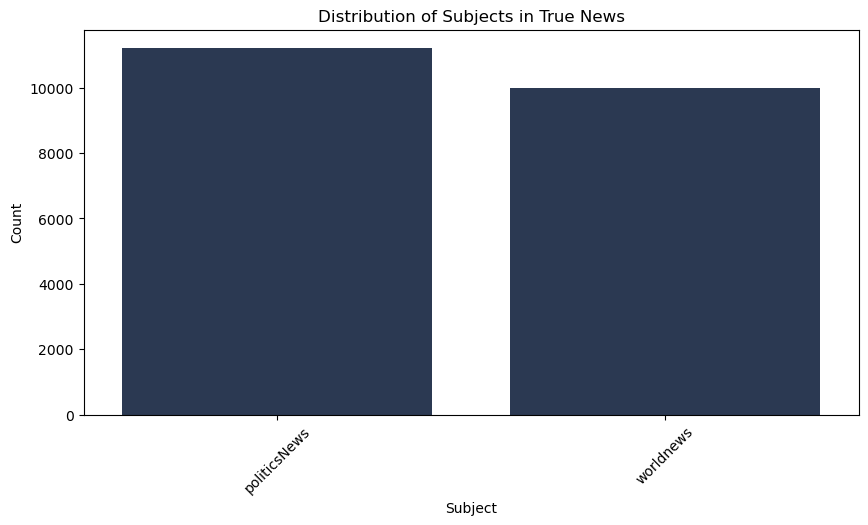

In [61]:
# Get the distribution of 'subject' in both datasets
true_subject_counts = true_news['subject'].value_counts()
fake_subject_counts = fake_news['subject'].value_counts()


# Plot the distribution for true news
plt.figure(figsize=(10, 5))
sns.barplot(x=true_subject_counts.index, y=true_subject_counts.values, color = '#253758')
plt.title('Distribution of Subjects in True News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()



It shows the distribution of subjects in true news. The higher the count, the more news articles were about that subject.


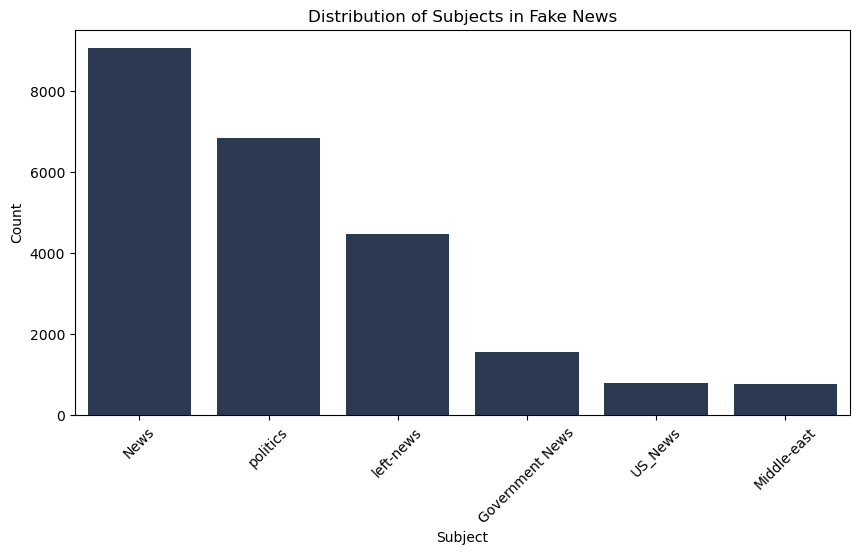

In [62]:
# Plot the distribution for fake news
plt.figure(figsize=(10, 5))
sns.barplot(x=fake_subject_counts.index, y=fake_subject_counts.values, color ='#253758')
plt.title('Distribution of Subjects in Fake News')
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


It shows the distribution of subjects in fake news by content. The content is divided into a number of different categories, including news, politics, and government. The most common subjects in fake news are news, politics, and government.

### Analysis of Article Length (Word Count)


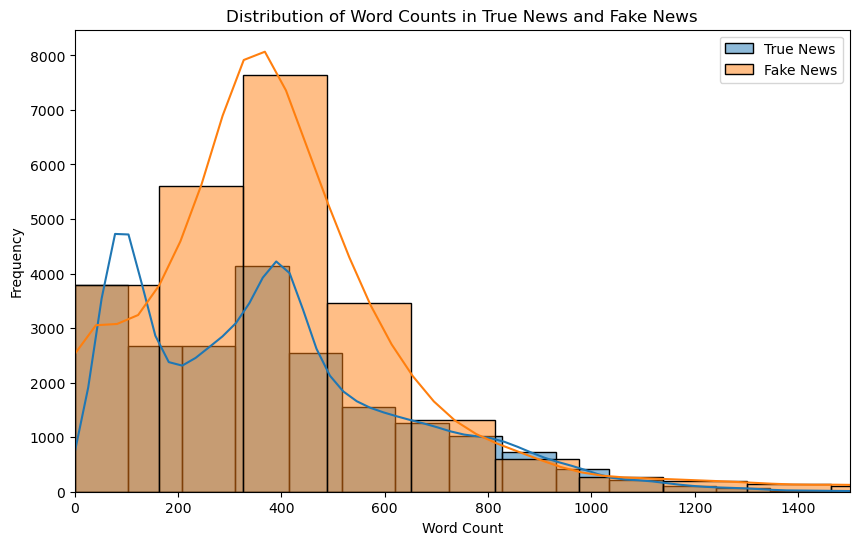

In [63]:

# Calculate word counts for both datasets
true_news['word_count'] = true_news['text'].apply(lambda x: len(x.split()))
fake_news['word_count'] = fake_news['text'].apply(lambda x: len(x.split()))

# Create a single plot with histograms for both datasets
plt.figure(figsize=(10, 6))
sns.histplot(true_news, x='word_count', kde='True', alpha=0.5, label='True News', bins=50)
sns.histplot(data=fake_news, x='word_count', kde='True', alpha=0.5, label='Fake News', bins=50)
plt.title('Distribution of Word Counts in True News and Fake News' )
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.xlim(0, 1500)
plt.legend()
plt.show()


- This  aims to visually compare the distribution of word counts between true and fake news datasets.

### Investigate Relationships between Subject and Class

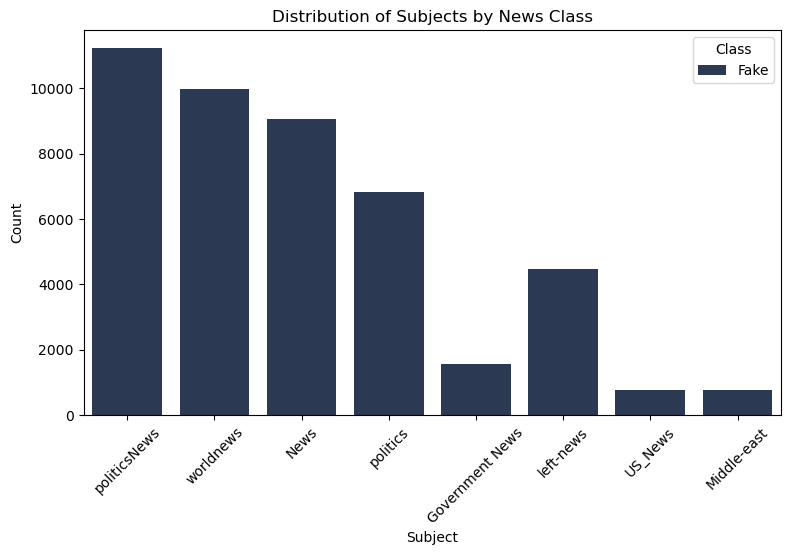

In [28]:

# Plot the relationship between 'subject' and 'class' using count plot
plt.figure(figsize=(9, 5))
sns.countplot(data=combined_data, x='subject', color='#253758')
plt.title("Distribution of Subjects by News Class")
plt.xlabel('Subject')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Class', labels=['Fake', 'True'])
plt.show()


There were more news stories about politics than any other subject. Politics news stories are broken down further into subcategories, such as Government News, World News, and US News.

###  Checking for Class Imbalance

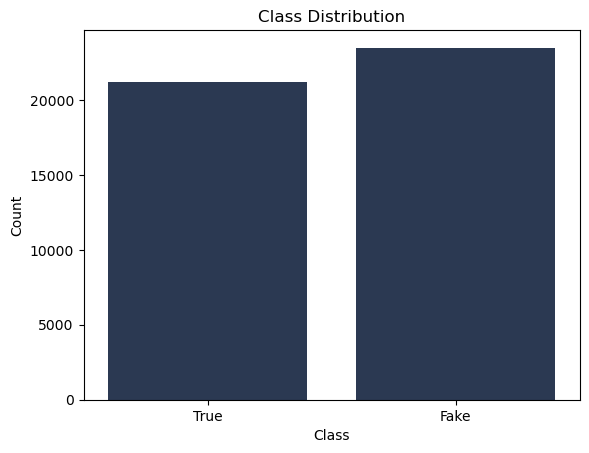

In [70]:
# Check the count of each class
class_distribution = combined_data['class'].value_counts()

# Plot the distribution to visualize any imbalance
sns.countplot(combined_data, x='class', color='#253758')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

- The distribution between the two classes  is approximately even.

## 4. Text Preprocessing

Text processing helps to prepare the text data for further analysis or modeling by cleaning it and reducing each word to its base form through stemming or lemmatization.

In [65]:
# Setup for stopwords, stemmer, and lemmatizer
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def remove_punctuation(text):   
    text = unicodedata.normalize('NFKD', text)
    extra_punctuation = '“”‘’—–' 
    punctuation = string.punctuation + extra_punctuation
    translator = str.maketrans('', '', punctuation)
    return text.translate(translator)

def preprocess_text(text):
    text = text.lower()
    text = remove_punctuation(text)
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    words = [stemmer.stem(word) for word in words]
    return ' '.join(words)

In [67]:
# Apply the preprocess_text function to your DataFrame columns
true_news['text'] = true_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

In [77]:
# Tokenize and remove stop words for true news
true_tokens = [word for text in true_news['text'] for word in text.split() if word not in stop_words]

# Tokenize and remove stop words for fake news
fake_tokens = [word for text in fake_news['text'] for word in text.split() if word not in stop_words]

### Visualization: Word Clouds

Text(0.5, 1.0, 'Word Cloud for True News')

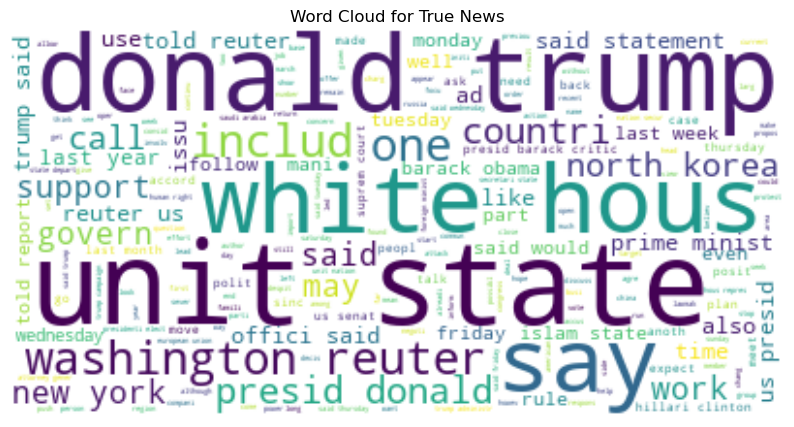

In [78]:
# Create a word cloud for true news
wordcloud_true = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(true_tokens))

# Create a word cloud for fake news
wordcloud_fake = WordCloud(stopwords=stop_words, background_color='white').generate(' '.join(fake_tokens))

# Plot word clouds
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for True News')

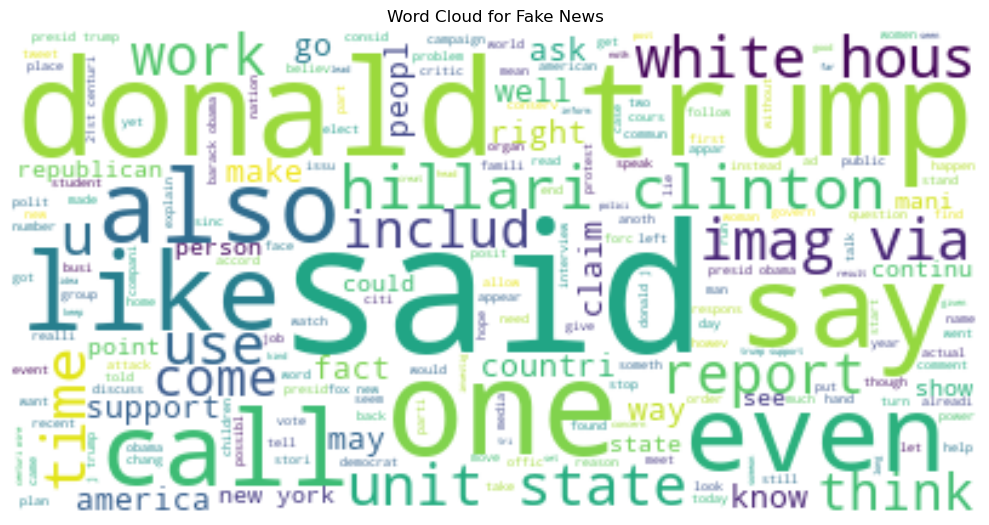

In [79]:
plt.figure(figsize=(10, 12))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Fake News')

plt.tight_layout()
plt.show()

#### Most Common Words in True News And Fake News

In [80]:
# Create word frequency counters
true_word_count = Counter(true_tokens)
fake_word_count = Counter(fake_tokens)

# Most common words in each dataset
most_common_true = true_word_count.most_common(10)
most_common_fake = fake_word_count.most_common(10)

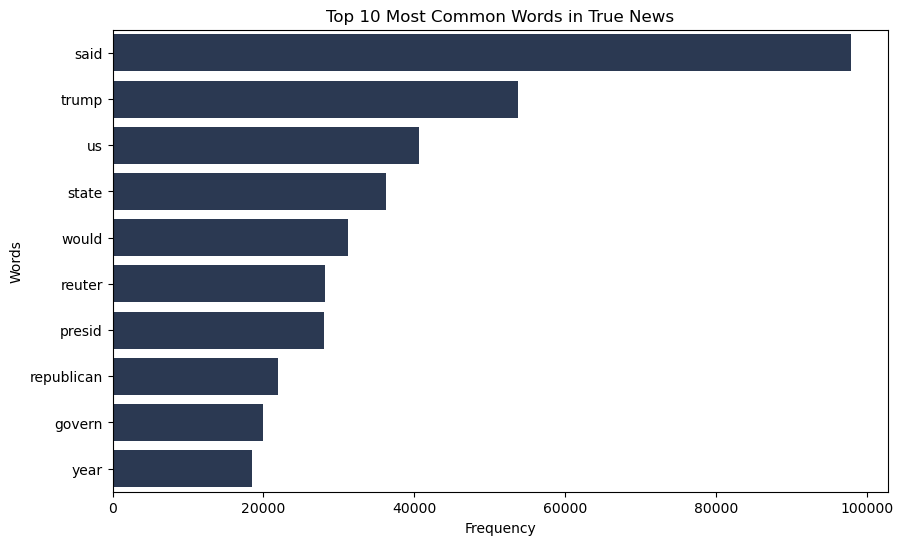

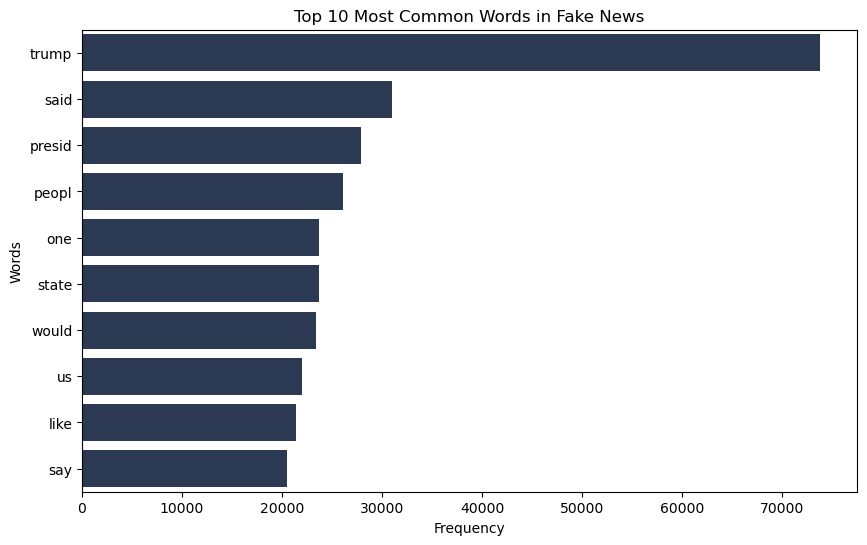

In [81]:
# Create bar plots for the most common words in true news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_true[:10]], y=[x[0] for x in most_common_true[:10]], color='#253758')
plt.title('Top 10 Most Common Words in True News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()

# Create bar plots for the most common words in fake news
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in most_common_fake[:10]], y=[x[0] for x in most_common_fake[:10]], color='#253758')
plt.title('Top 10 Most Common Words in Fake News')
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.show()



- This indicates some of the most common words in both datasets are related to politics and Donald Trump. 

## 5. Modeling
### Model Training

In [82]:
vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(true_news['text'])
X_fake = vectorizer.transform(fake_news['text'])
X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])   

In [83]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 1. Logistic Regression

In [84]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [85]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9953009621839337


- These metrics suggest that the baseline model (logistic regression model) is performing exceptionally well in identifying fake news. 

### Long Short Term Memory Networks (LSTM)


In [86]:
# Define maximum vocabulary size and sequence length
vocab_size = 5000
max_len = 100 

# Instantiate tokenizer and fit on text data (both real and fake)
tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(np.concatenate([true_news['text'], fake_news['text']]))

# Convert text data to sequences
X_real_seq = tokenizer.texts_to_sequences(true_news['text'])
X_fake_seq = tokenizer.texts_to_sequences(fake_news['text'])

# Pad sequences to ensure they have the same length
X_real_seq = pad_sequences(X_real_seq, maxlen=max_len)
X_fake_seq = pad_sequences(X_fake_seq, maxlen=max_len)

# Concatenate the sequences and create target labels
X_seq = np.concatenate([X_real_seq, X_fake_seq])
y_seq = np.concatenate([np.ones(len(X_real_seq)), np.zeros(len(X_fake_seq))])

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


In [87]:
model = Sequential()
model.add(Embedding(vocab_size, 128))  
model.add(LSTM(64, return_sequences=True)) 
model.add(Dropout(0.5))
model.add(LSTM(32)) 
model.add(Dense(1, activation='sigmoid'))

# Compile the model and train the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 104s 88ms/step - accuracy: 0.9218 - loss: 0.1895 - val_accuracy: 0.9762 - val_loss: 0.0671
Epoch 2/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 94s 84ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9780 - val_loss: 0.0636
Epoch 3/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 95s 85ms/step - accuracy: 0.9921 - loss: 0.0256 - val_accuracy: 0.9825 - val_loss: 0.0537
Epoch 4/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 95s 85ms/step - accuracy: 0.9967 - loss: 0.0116 - val_accuracy: 0.9792 - val_loss: 0.0803
Epoch 5/5
1118/1118 ━━━━━━━━━━━━━━━━━━━━ 94s 84ms/step - accuracy: 0.9969 - loss: 0.0107 - val_accuracy: 0.9813 - val_loss: 0.0656


In [88]:
# Evaluate model on test set
test_accuracy = model.evaluate(X_test, y_test)
print("Test accuracy:", test_accuracy)

280/280 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step - accuracy: 0.9826 - loss: 0.0602
Test accuracy: [0.06564654409885406, 0.9813157320022583]


- The model achieved high accuracy during training and testing, indicating strong performance in detecting fake news. The training accuracy reached 99%, suggesting a near-perfect fit, while the test accuracy was approximately 98.13%. These results suggest that the model is effective in distinguishing between real and fake news.

### Tuning LSTM (additional LSTM layer)

In [89]:
num_epochs = 10 
batch_size = 16 
learning_rate = 0.001  
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(vocab_size, 256), 
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model with a custom learning rate and train the model
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=num_epochs, batch_size=batch_size)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test loss:", test_loss)
print("Test accuracy:", test_accuracy)


Epoch 1/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 239s 105ms/step - accuracy: 0.9185 - loss: 0.2042 - val_accuracy: 0.9537 - val_loss: 0.1168
Epoch 2/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 262s 117ms/step - accuracy: 0.9742 - loss: 0.0794 - val_accuracy: 0.9775 - val_loss: 0.0621
Epoch 3/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 343s 154ms/step - accuracy: 0.9868 - loss: 0.0423 - val_accuracy: 0.9815 - val_loss: 0.0535
Epoch 4/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 349s 156ms/step - accuracy: 0.9918 - loss: 0.0252 - val_accuracy: 0.9855 - val_loss: 0.0478
Epoch 5/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 390s 160ms/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9828 - val_loss: 0.0623
Epoch 6/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 327s 146ms/step - accuracy: 0.9964 - loss: 0.0118 - val_accuracy: 0.9843 - val_loss: 0.0643
Epoch 7/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 316s 141ms/step - accuracy: 0.9971 - loss: 0.0107 - val_accuracy: 0.9846 - val_loss: 0.0694
Epoch 8/10
2235/2235 ━━━━━━━━━━━━━━━━━━━━ 324s 145ms/step - ac

- The model achieved a test accuracy of 98.46% with a test loss of 0.088 after 10 epochs, indicating strong performance in classifying real and fake news. These results suggest effective learning, though consistent test loss across epochs implies potential room for improvement.

## Model Evaluation


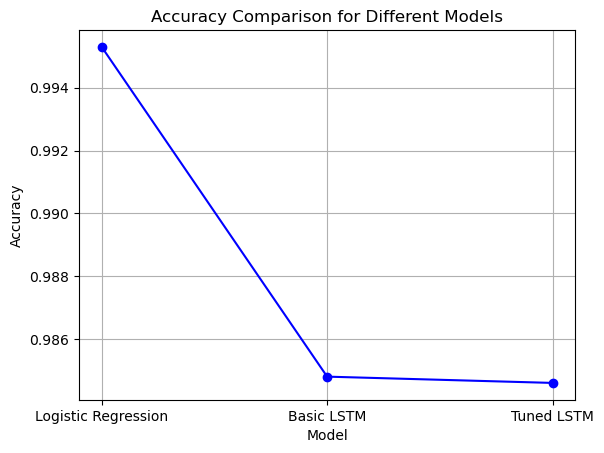

In [90]:
model_names = ['Logistic Regression', 'Basic LSTM', 'Tuned LSTM']
accuracies = [0.9953, 0.9848, 0.9846] 

# Create a line plot
plt.plot(model_names, accuracies, marker='o', linestyle='-', color='b') 
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Different Models')
plt.grid(True) 
plt.show()

- Logistic Regression:
Accuracy: 99.53% (highest among the three models).
- LSTM:
Accuracy: 98.48% (second highest).
- Tuned LSTM:
Accuracy: 98.46% (slightly lower than Basic LSTM).


- Logistic Regression performed the best in terms of accuracy.
- Basic LSTM and Tuned LSTM showed comparable results with slight variations.
- Results suggest that traditional models like Logistic Regression can be more accurate than deep learning models in some cases.

# **Minimum Viable Product**

Logistic Regression, with a 99.53% accuracy rate, stands out as the best model for fake news detection among the evaluated models. Its high accuracy allows for precise identification and flagging of fake news, reducing false positives and negatives. By analyzing text-based features, Logistic Regression can quickly and effectively classify news articles as real or fake, making it a reliable choice for combating misinformation in real-time scenarios. This accuracy ensures robust content filtering and helps maintain information integrity.

How Logistic Regression Helps Media Companies Combat Fake News -:
- High Accuracy (99.53%): Ensures reliable identification of fake news, reducing errors in detection.
- Minimizes False Positives/Negatives: Helps avoid mislabeling and missing critical misinformation.
- Supports Real-time Detection: Crucial for rapid response in social media environments.
- Enhances Media Reputation: Accurate detection helps build public trust in media organizations.
- Reduces Legal/Reputational Risks: Limits the spread of misinformation, avoiding legal issues and reputational damage.
- Contributes to a Well-informed Society: Accurate news delivery supports informed public discourse.

# Saving the Model

In [37]:
# Save the trained logistic regression model
joblib.dump(LogisticRegression, 'logistic_regression_model.pkl')

# Save the CountVectorizer
joblib.dump(vectorizer, 'CountVectorizer.pkl')

['CountVectorizer.pkl']

# Limitations

While the project has made significant strides in fake news detection, several limitations must be acknowledged. Firstly, the dataset used for training and evaluation primarily consists of news articles from the United States, predominantly focusing on political subjects. This inherent bias in the data may limit the generalizability of the models to other regions or topics. Moreover, the dataset size, while substantial, may not encompass the full spectrum of fake news characteristics, potentially leading to model overfitting or underperformance on unseen data. Additionally, the preprocessing techniques applied to the text data, such as stemming or lemmatization, may inadvertently remove context or nuance crucial for accurate classification. 

# Next Steps

- Diversify Dataset: Add news articles from different places, languages, and topics to understand fake news better in various situations.
- Improve Text Processing: Make text processing better to keep important meanings while getting rid of unnecessary details. Try new methods like contextual embeddings to get more useful information from the text.

# Recommendation

1. Education and Media Literacy: Launch campaigns to teach people how to spot fake news, especially focusing on students, seniors, and marginalized groups.
2. Partnerships with Tech Companies: Work with tech companies and social media platforms to use their tools to find and stop fake news. Push for clear rules and accountability.
3. Continuous Improvement: Keep making fake news detection better by listening to feedback and learning from mistakes.
4. Regulatory and Policy Action: Push for laws and rules to fight fake news online, working with governments and organizations.
5. Invest in Research: Keep investing in research to make better tools for finding fake news, bringing together experts from different fields like data science and journalism.